<a href="https://colab.research.google.com/github/Magaton1010/Python_Analysis/blob/main/outlier_Dtection_Neighbor_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neighbor Based

The Local-Outlier-Factor is an alternative method for detecting outliers.
It operates by calculating the local variation of a specific data point in relation to its neighboring points.
This variation is then compared to the average variation of the neighboring points.
If a data point’s variation is significantly greater than that of its neighbors, it is classified as an outlier.
The selection of the number of neighbors to include influences the identification and location of outliers within the data distribution.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler # Import the scaler


In [30]:
# Load your data (replace with your actual path)
data = pd.read_csv('/content/sample_data/california_housing_test.csv')
data.columns # Get the column names of the DataFrame

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# normalization

To compare two columns, 'median_income' and 'median_house_value', using the LocalOutlierFactor algorithm need to normalize them to make these columns comparable.
This ensures they are on a similar scale, preventing one column from disproportionately influencing the outlier detection process.
Normalization can be used to adjust data attributes to make it easier to compare values in different units and scales.
For example, z-score normalization can be used to make the range of an x-axis smaller so that it doesn't dominate the range of the y-axis.

In [31]:
# Select the columns to normalize
cols_to_normalize = ['median_income', 'median_house_value']

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the selected columns
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])


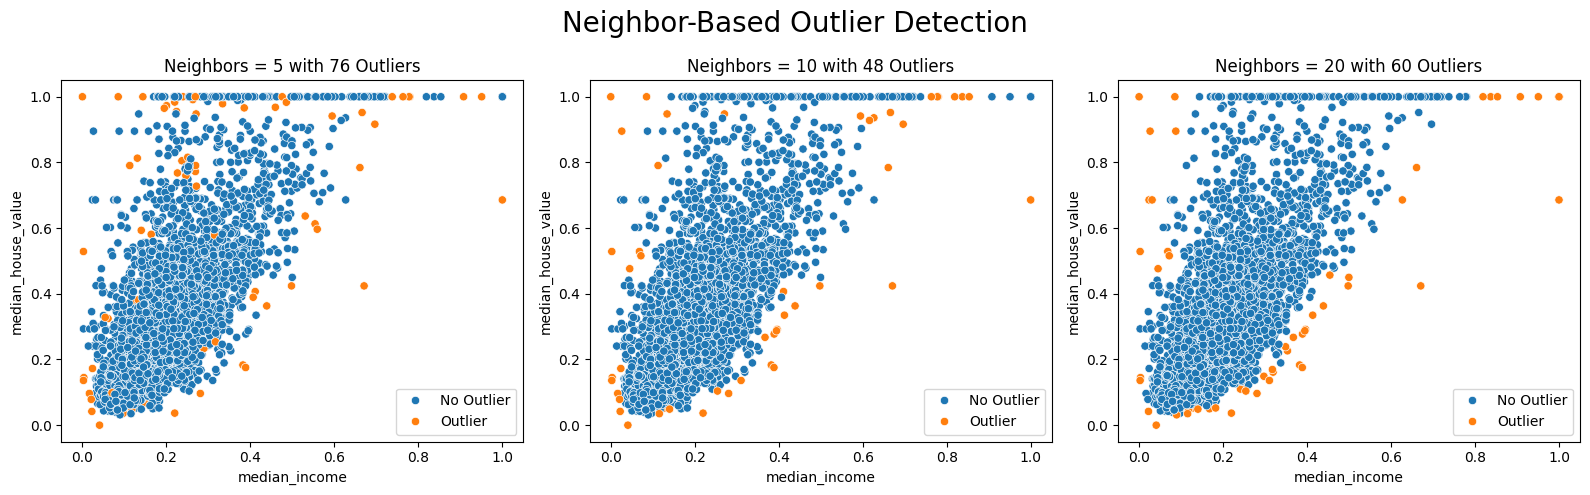

In [32]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 5))## create plot with three sub-plots
fig.suptitle('Neighbor-Based Outlier Detection', size=20)
for i, n in enumerate([5, 10, 20]):## the number determines how many neighbored data points are considered
    lof = LocalOutlierFactor(n_neighbors=n)
    mask = lof.fit_predict(data[['median_income', 'median_house_value']])
    sns.scatterplot(data=data, x='median_income', y='median_house_value', hue=np.where(mask==1, 'No Outlier', 'Outlier'), ax=axs[i])
    axs[i].set(title=f'Neighbors = {n} with {sum(mask == -1)} Outliers')
plt.tight_layout()
plt.show()